成功提取100个epoch的数据


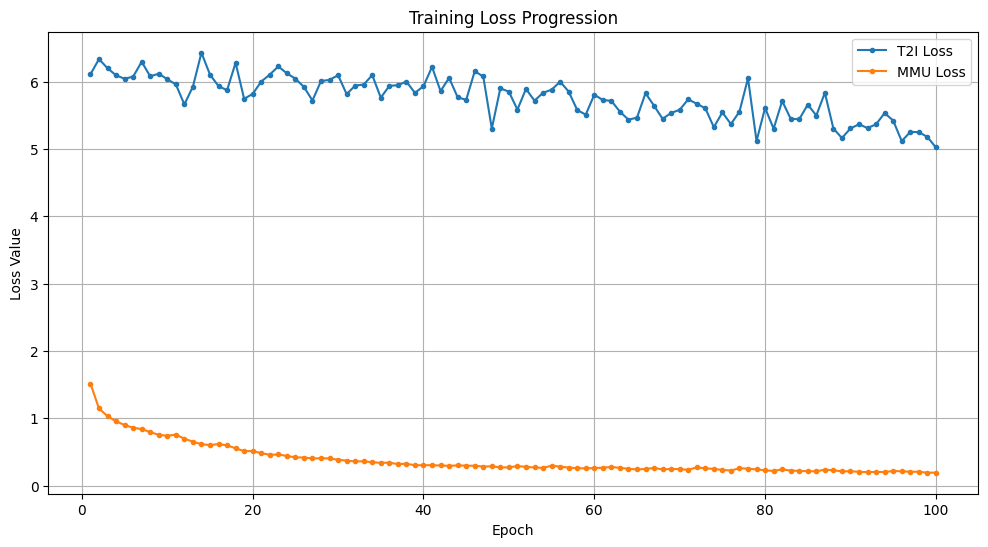

In [1]:
import re
import matplotlib.pyplot as plt

def extract_losses(file_path):
    t2i_losses = []
    mmu_losses = []
    
    with open(file_path, 'r') as file:
        for line in file:
            line = line.strip()
                
            # 检测包含loss数据的行
            if  ('loss_t2i' in line and 'loss_mmu' in line):
                # 使用正则表达式提取数值
                t2i_match = re.search(r'loss_t2i: ([\d.]+)', line)
                mmu_match = re.search(r'loss_mmu: ([\d.]+)', line)
                
                if t2i_match and mmu_match:
                    t2i_losses.append(float(t2i_match.group(1)))
                    mmu_losses.append(float(mmu_match.group(1)))

    return t2i_losses, mmu_losses

def plot_losses(t2i_losses, mmu_losses):
    plt.figure(figsize=(12, 6))
    epochs = range(1, len(t2i_losses) + 1)
    
    plt.plot(epochs, t2i_losses, label='T2I Loss', marker='o', markersize=3)
    plt.plot(epochs, mmu_losses, label='MMU Loss', marker='o', markersize=3)
    
    plt.xlabel('Epoch')
    plt.ylabel('Loss Value')
    plt.title('Training Loss Progression')
    plt.legend()
    plt.grid(True)
    plt.savefig('loss_plot.png')
    plt.show()


file_path = "/home/arc/Show-o/loss_2_7_v0.txt"  # 请替换为你的文件路径
t2i, mmu = extract_losses(file_path)

# 检查数据完整性
if len(t2i) != 100 or len(mmu) != 100:
    print(f"警告：提取到{len(t2i)}个epoch数据，预期100个")
else:
    print("成功提取100个epoch的数据")

plot_losses(t2i, mmu)

成功提取100个epoch的数据


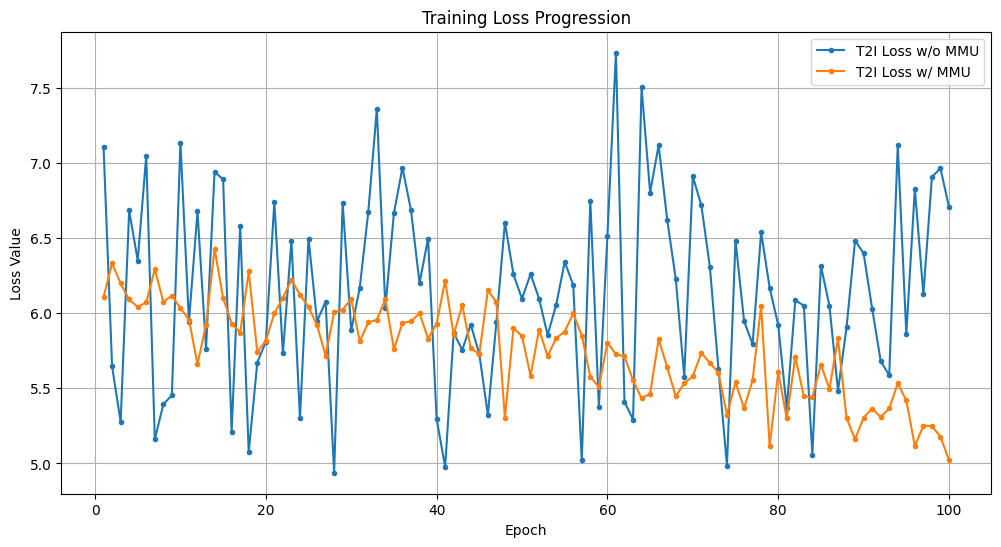

In [3]:
import re
import matplotlib.pyplot as plt

def extract_losses_only_t2i(file_path):
    t2i_losses = []
    
    with open(file_path, 'r') as file:
        for line in file:
            line = line.strip()
                
            # 检测包含loss数据的行
            if  ('loss_t2i' in line):
                # 使用正则表达式提取数值
                t2i_match = re.search(r'loss_t2i: ([\d.]+)', line)
                # mmu_match = re.search(r'loss_mmu: ([\d.]+)', line)
                
                if t2i_match:
                    t2i_losses.append(float(t2i_match.group(1)))
                    # mmu_losses.append(float(mmu_match.group(1)))

    return t2i_losses

def plot_losses_new(t2i_only, t2i):
    plt.figure(figsize=(12, 6))
    epochs = range(1, len(t2i) + 1)
    
    plt.plot(epochs, t2i_only, label='T2I Loss w/o MMU', marker='o', markersize=3)
    plt.plot(epochs, t2i, label='T2I Loss w/ MMU', marker='o', markersize=3)
    
    plt.xlabel('Epoch')
    plt.ylabel('Loss Value')
    plt.title('Training Loss Progression')
    plt.legend()
    plt.grid(True)
    # plt.savefig('loss_plot.png')
    plt.show()


file_path = "/home/arc/Show-o/loss_only_t2i.txt"  # 请替换为你的文件路径
t2i_only = extract_losses_only_t2i(file_path)

# 检查数据完整性
if len(t2i) != 100 or len(mmu) != 100:
    print(f"警告：提取到{len(t2i)}个epoch数据，预期100个")
else:
    print("成功提取100个epoch的数据")

plot_losses_new(t2i_only, t2i)